In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [17]:
# Lecture de la base de données

# Construire le chemin d'accès au dataset
script_dir = os.path.abspath('')
relative_path = 'dataset/dataset_merged.csv'
csv_path = os.path.join(script_dir, relative_path)

# Chargez le fichier CSV
dataset = pd.read_csv(csv_path)
print(dataset.head())

         date   service         gare_depart         gare_arrivee  \
0  2018-01-01  National    BORDEAUX ST JEAN   PARIS MONTPARNASSE   
1  2018-01-01  National   LA ROCHELLE VILLE   PARIS MONTPARNASSE   
2  2018-01-01  National  PARIS MONTPARNASSE              QUIMPER   
3  2018-01-01  National  PARIS MONTPARNASSE              ST MALO   
4  2018-01-01  National  PARIS MONTPARNASSE  ST PIERRE DES CORPS   

   duree_moyenne  nb_train_prevu  nb_annulation  nb_train_depart_retard  \
0            141             870              5                     289   
1            165             222              0                       8   
2            220             248              1                      37   
3            156             102              0                      12   
4             61             391              2                      61   

   retard_moyen_depart  retard_moyen_tous_trains_depart  ...  \
0            11.247809                         3.693179  ...   
1           

In [18]:
# Basic statistics for each column
desc_stats = dataset.describe()

# Checking for missing values
missing_values = dataset.isnull().sum()

dataset


,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,nb_train_depart_retard,retard_moyen_depart,retard_moyen_tous_trains_depart,...,nb_train_retard_sup_30,nb_train_retard_sup_60,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,Total Voyageurs annuel,Total Voyageurs + non voyageurs annuel
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,289,11.247809,3.693179,...,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,16080989.0,19853073.0
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,8,2.875000,0.095796,...,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,1984267.0,2511730.0
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,37,9.501351,1.003981,...,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,59174533.0,73296351.0
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,12,19.912500,1.966667,...,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,59174533.0,73296351.0
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,61,7.796995,0.886889,...,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,59174533.0,73296351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06-01,National,STRASBOURG,PARIS EST,114,492,2,273,11.989927,6.742041,...,31,10,7.619048,5.714286,55.238095,18.095238,7.619048,5.714286,NaN,NaN
8150,2023-06-01,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,24,28.730556,3.181240,...,24,10,13.888889,33.333333,8.333333,19.444444,8.333333,16.666667,NaN,NaN
8151,2023-06-01,National,TOURS,PARIS MONTPARNASSE,78,192,1,20,31.281667,3.276353,...,7,5,14.285714,21.428571,28.571429,21.428571,3.571429,10.714286,NaN,NaN
8152,2023-06-01,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,347,13.517051,10.271499,...,62,22,26.724138,19.827586,27.586207,7.758621,7.758621,10.344828,NaN,NaN


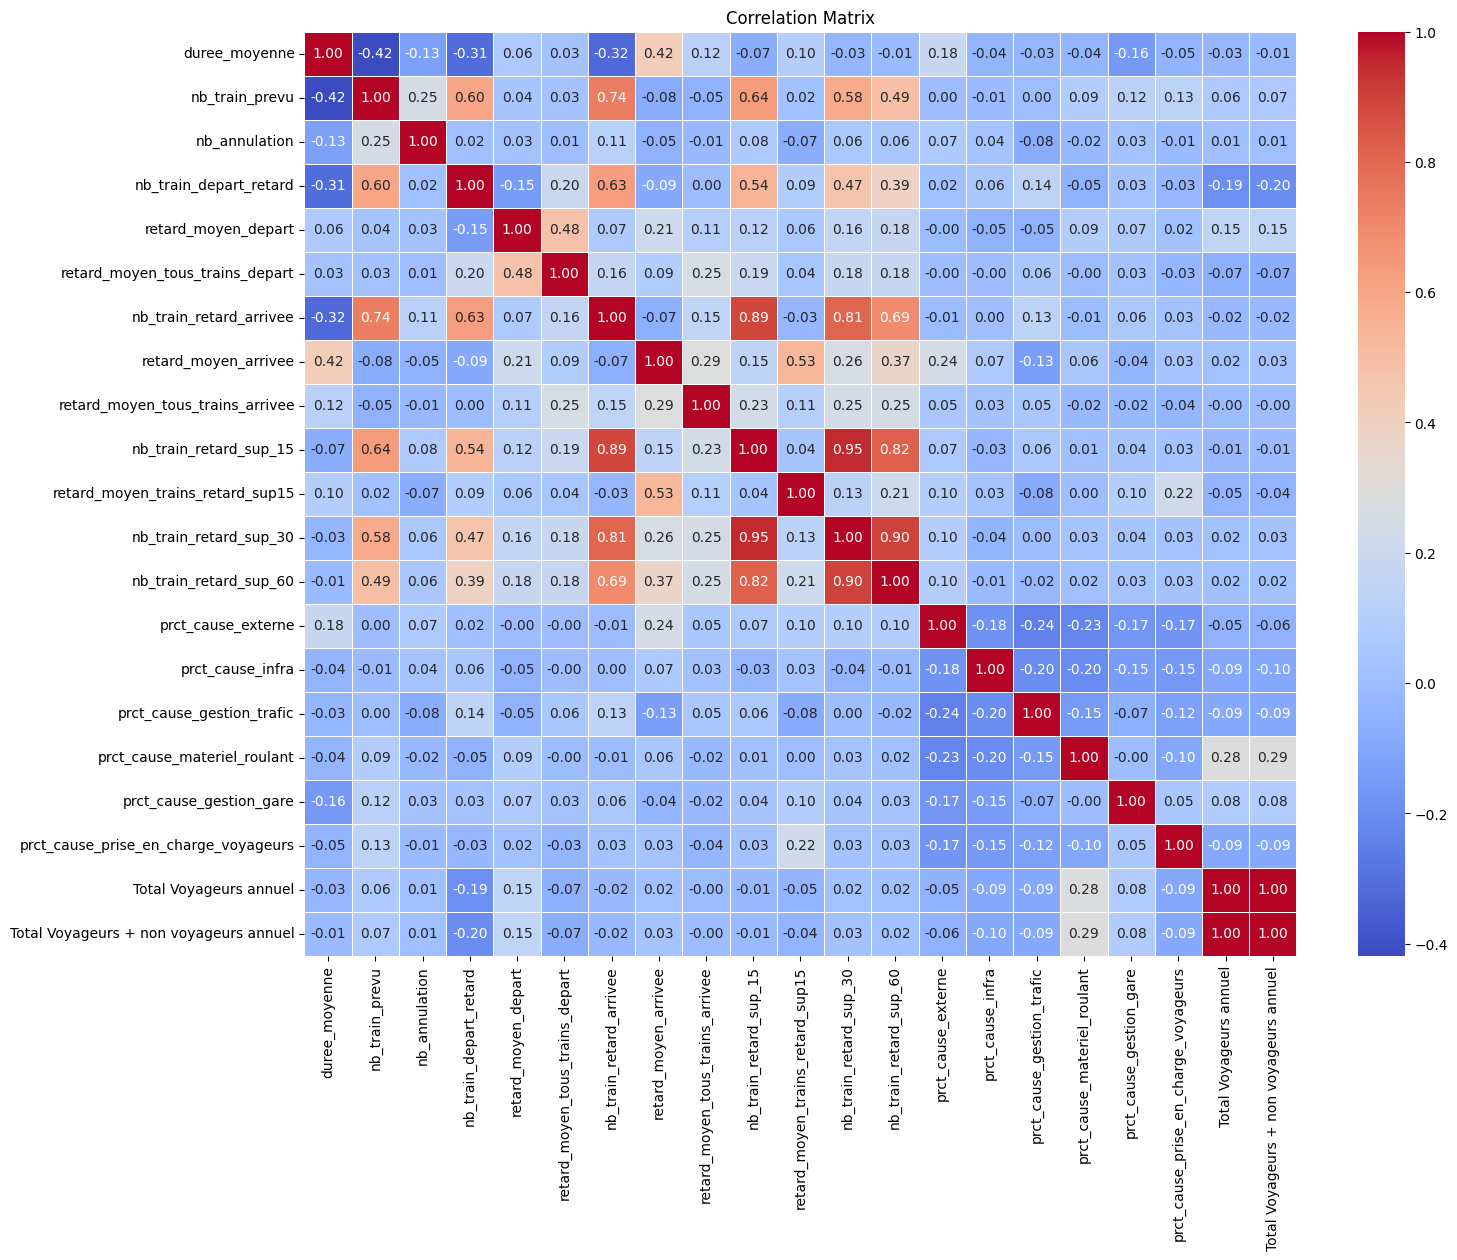

In [19]:
columns_to_drop = ['date',	'service',	'gare_depart',	'gare_arrivee']
dataset_corr = dataset.drop(columns=columns_to_drop, axis=0)
# Compute the correlation matrix
corr_matrix = dataset_corr.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

La heatmap montre les corrélations entre les différentes caractéristiques du dataset. Voici quelques observations :

- Il y a une forte corrélation entre les différents types de retards (par exemple, nb_train_depart_retard, nb_train_retard_arrivee, nb_train_retard_sup_15, etc.). C'est attendu car les jours où il y a beaucoup de retards à l'arrivée, il y a probablement aussi beaucoup de retards au départ.

- Les causes des retards (comme prct_cause_externe, prct_cause_infra, etc.) ne semblent pas fortement corrélées avec d'autres caractéristiques. Cela pourrait expliquer pourquoi il est difficile de prédire la cause majeure de retard en se basant sur les autres caractéristiques.

- Les colonnes Total Voyageurs annuel et Total Voyageurs + non voyageurs annuel sont fortement corrélées entre elles. C'est logique car le nombre total de non-voyageurs devrait augmenter proportionnellement avec le nombre total de voyageurs.

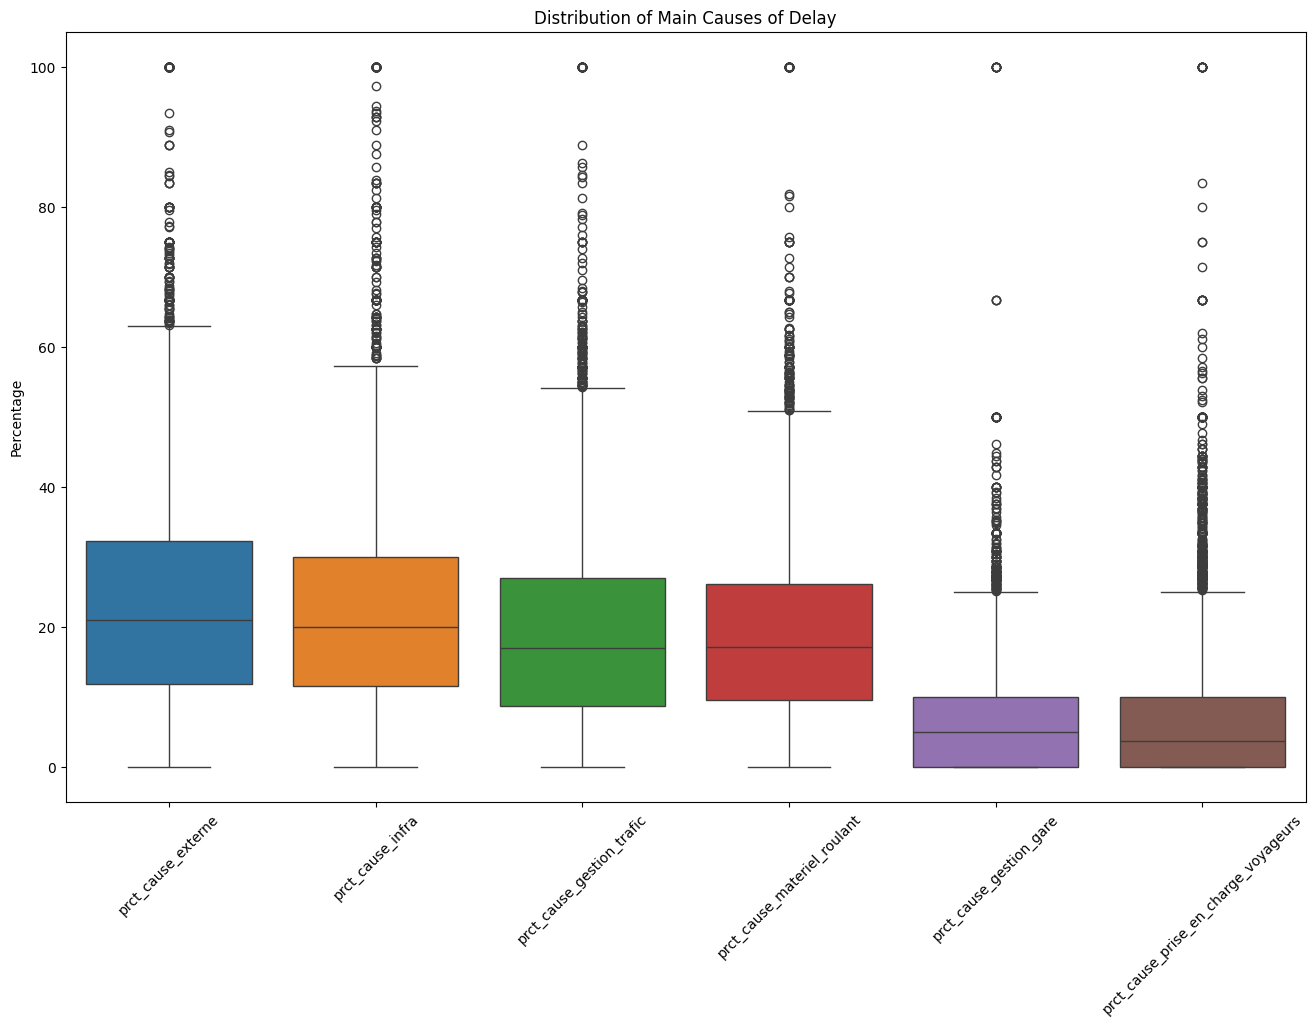

In [20]:
# Causes of delay columns
causes_columns = [
    'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic', 
    'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 
    'prct_cause_prise_en_charge_voyageurs'
]

# Plotting boxplots for each cause
plt.figure(figsize=(16, 10))
sns.boxplot(data=dataset[causes_columns])
plt.title("Distribution of Main Causes of Delay")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

Les boxplots montrent la distribution des principales causes de retard. Voici quelques observations :

- Les causes externes (prct_cause_externe) ont généralement un pourcentage plus élevé par rapport aux autres causes, bien que la distribution soit assez large.

- Les problèmes d'infrastructure (prct_cause_infra) et de matériel roulant (prct_cause_materiel_roulant) sont également des causes fréquentes de retard, avec une distribution similaire.

- La gestion du trafic (prct_cause_gestion_trafic) et la prise en charge des voyageurs (prct_cause_prise_en_charge_voyageurs) ont généralement un pourcentage plus faible, mais il y a quelques exceptions où ces causes ont contribué de manière significative aux retards.

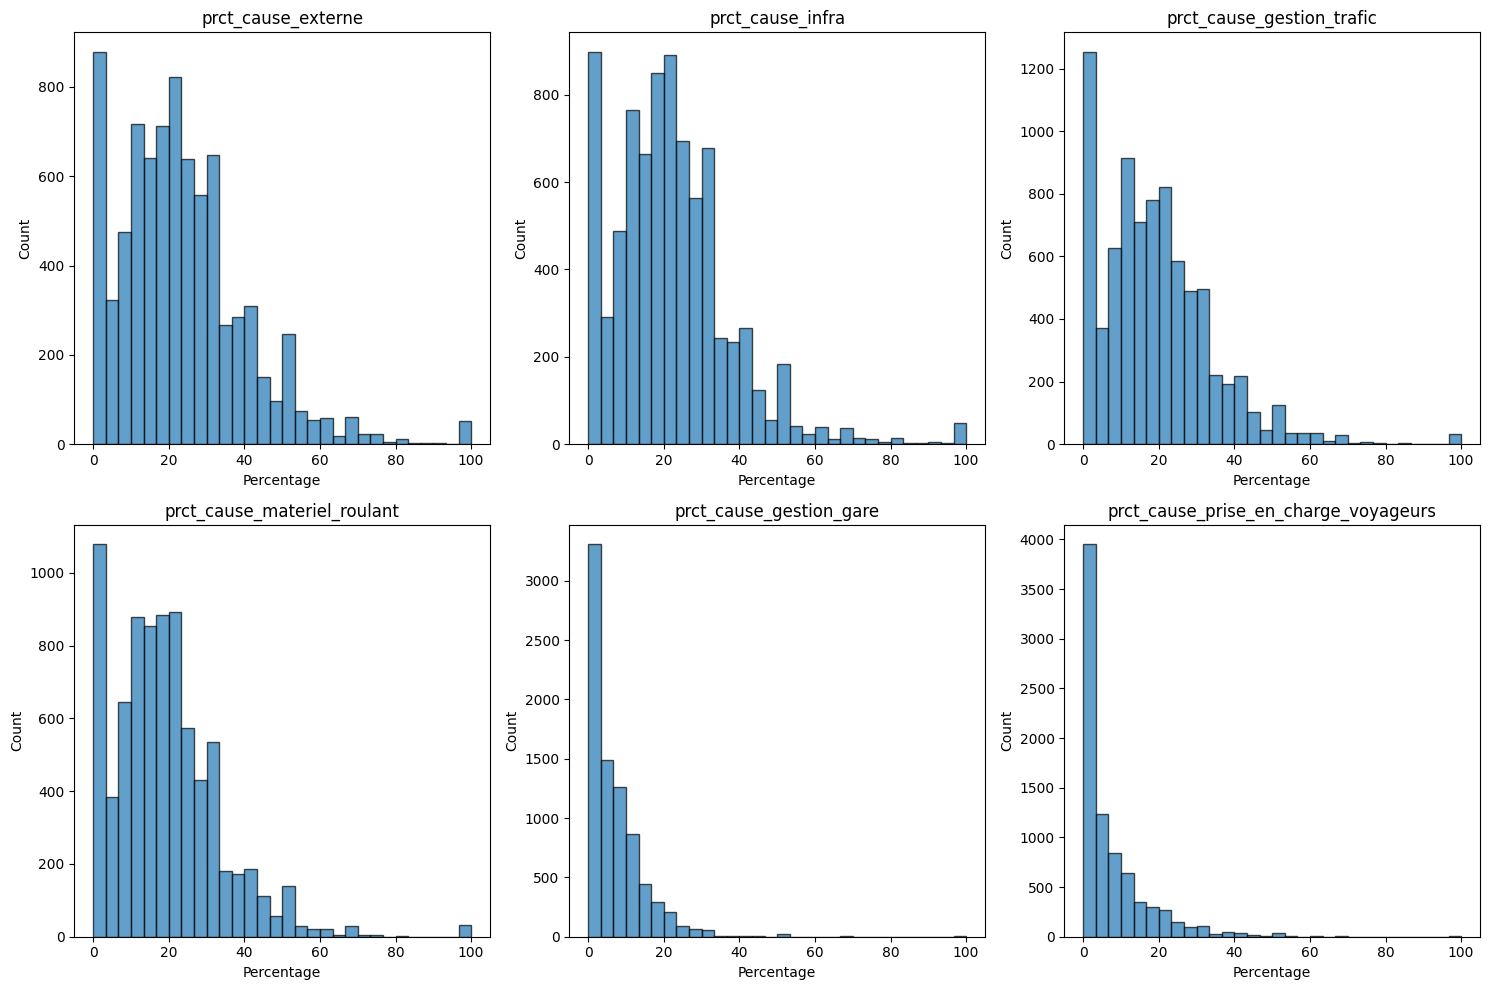

In [21]:
# Columns related to causes of delay
cause_columns = [
    'prct_cause_externe',
    'prct_cause_infra',
    'prct_cause_gestion_trafic',
    'prct_cause_materiel_roulant',
    'prct_cause_gestion_gare',
    'prct_cause_prise_en_charge_voyageurs'
]

# Plotting the distribution for each cause
plt.figure(figsize=(15, 10))
for i, column in enumerate(cause_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(dataset[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(column)
    plt.xlabel('Percentage')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



Voici les observations basées sur les distributions des causes de retard :

- Cause externe : La plupart des trajets semblent avoir un faible pourcentage de retards dus à des causes externes, mais il y a une distribution assez large.

- Infrastructure : La distribution semble étalée avec de nombreux trajets ayant un faible pourcentage de retards dus à l'infrastructure, mais également un bon nombre avec des pourcentages plus élevés.

- Gestion du trafic : Beaucoup de trajets ont un faible pourcentage de retards dus à la gestion du trafic, mais certains ont des pourcentages plus élevés.

- Matériel roulant : La distribution est similaire à celle de la gestion du trafic, avec de nombreux trajets ayant un faible pourcentage de retards dus au matériel roulant.

- Gestion de la gare : La majorité des trajets ont un faible pourcentage de retards dus à la gestion de la gare, mais il y a également une distribution pour des pourcentages plus élevés.

- Prise en charge des voyageurs : La majorité des trajets ont un faible pourcentage de retards dus à la prise en charge des voyageurs.

<h3><strong>Prétraitement des données :</strong></h3><p>

Pour notre approche nous avons décidé de prédire la cause majoritaire du retard, nous avons alors créer une nouvelle colonne 'major_cause' pour relever la cause majeure pour chaque retard.

In [22]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['annee'] = dataset['date'].dt.year
# Split the data into training and test sets based on the year
train_data = dataset[dataset['annee'] < 2023]
test_data = dataset[dataset['annee'] == 2023]
# Display the shapes of the training and test data
train_data.shape, test_data.shape



# Identify the features and target variable
features = train_data.columns.difference(['retard_moyen_arrivee', 'date', 'my','Total Voyageurs annuel','Total Voyageurs + non voyageurs annuel'])

# Display the identified features
features

Index(['annee', 'duree_moyenne', 'gare_arrivee', 'gare_depart',
       'nb_annulation', 'nb_train_depart_retard', 'nb_train_prevu',
       'nb_train_retard_arrivee', 'nb_train_retard_sup_15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'prct_cause_externe', 'prct_cause_gestion_gare',
       'prct_cause_gestion_trafic', 'prct_cause_infra',
       'prct_cause_materiel_roulant', 'prct_cause_prise_en_charge_voyageurs',
       'retard_moyen_depart', 'retard_moyen_tous_trains_arrivee',
       'retard_moyen_tous_trains_depart', 'retard_moyen_trains_retard_sup15',
       'service'],
      dtype='object')

Création de la colonne 'major_cause' pour prédire la cause majoritaire.

In [23]:
# Extract columns representing the percentage of each delay cause
cause_columns = [
    'prct_cause_externe', 'prct_cause_infra', 'prct_cause_gestion_trafic', 
    'prct_cause_materiel_roulant', 'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs'
]

# Identify the major cause for each record
dataset['major_cause'] = dataset[cause_columns].idxmax(axis=1)

# Display the first few rows to check the created column
dataset[['major_cause'] + cause_columns].head()

,major_cause,prct_cause_externe,prct_cause_infra,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs
0,prct_cause_externe,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336
1,prct_cause_gestion_trafic,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000
2,prct_cause_infra,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000
3,prct_cause_infra,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000
4,prct_cause_infra,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000


On procède à un encodage 'one hot' pour les données catégorielles.

In [24]:
from sklearn.preprocessing import OneHotEncoder
train_data_class = dataset[dataset['date'].dt.year < 2023]
test_data_class = dataset[dataset['date'].dt.year == 2023]

# One-hot encode categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)

train_encoded = encoder.fit_transform(train_data_class[['gare_arrivee', 'gare_depart', 'service']])
test_encoded = encoder.transform(test_data_class[['gare_arrivee', 'gare_depart', 'service']])

train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(['gare_arrivee', 'gare_depart', 'service'])
, index=train_data.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(['gare_arrivee', 'gare_depart', 'service'])
, index=test_data.index)

# Drop original categorical columns and concatenate the one-hot encoded columns
train_data_class = pd.concat([train_data_class.drop(columns=['gare_arrivee', 'gare_depart', 'service']), train_encoded_df], axis=1)
test_data_class = pd.concat([test_data_class.drop(columns=['gare_arrivee', 'gare_depart', 'service']), test_encoded_df], axis=1)

# Update the features list after one-hot encoding
features_class = train_data_class.columns.difference(['major_cause', 'date', 'my','year', 'annee','Total Voyageurs annuel','Total Voyageurs + non voyageurs annuel']+ cause_columns)

features_class

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['duree_moyenne', 'gare_arrivee_ANGERS SAINT LAUD',
       'gare_arrivee_ANGOULEME', 'gare_arrivee_ANNECY', 'gare_arrivee_ARRAS',
       'gare_arrivee_AVIGNON TGV', 'gare_arrivee_BARCELONA',
       'gare_arrivee_BELLEGARDE (AIN)',
       'gare_arrivee_BESANCON FRANCHE COMTE TGV',
       'gare_arrivee_BORDEAUX ST JEAN',
       ...
       'nb_train_retard_arrivee', 'nb_train_retard_sup_15',
       'nb_train_retard_sup_30', 'nb_train_retard_sup_60',
       'retard_moyen_arrivee', 'retard_moyen_depart',
       'retard_moyen_tous_trains_arrivee', 'retard_moyen_tous_trains_depart',
       'retard_moyen_trains_retard_sup15', 'service_National'],
      dtype='object', length=130)

<h3><strong>Modèles de classification et évaluation:</strong></h3><p>

<h4><strong>Random Forest et régression logistique:</strong></h4><p>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


# Update train_data and test_data with 'major_cause' column
# Sélectionnez les caractéristiques et la variable cible
X_train_class = train_data_class[features_class]
y_train_class = train_data_class['major_cause']
X_test_class = test_data_class[features_class]
y_test_class = test_data_class['major_cause']



# Liste des modèles à évaluer
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
}

# Entraînement et évaluation de chaque modèle
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train_class, y_train_class)
    y_pred = model.predict(X_test_class)
    # Calculating and printing the accuracy
    accuracy = accuracy_score(y_test_class, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_class, y_pred))
    print(confusion_matrix(y_test_class, y_pred))
    print("-------------------------------------------------------------")



Evaluating Random Forest...
Accuracy: 0.4463
                                      precision    recall  f1-score   support

                  prct_cause_externe       0.35      0.65      0.45       188
             prct_cause_gestion_gare       0.00      0.00      0.00        10
           prct_cause_gestion_trafic       0.75      0.42      0.54       184
                    prct_cause_infra       0.46      0.26      0.33       175
         prct_cause_materiel_roulant       0.47      0.50      0.49       160
prct_cause_prise_en_charge_voyageurs       0.00      0.00      0.00         9

                            accuracy                           0.45       726
                           macro avg       0.34      0.30      0.30       726
                        weighted avg       0.50      0.45      0.44       726

[[122   0  10  16  37   3]
 [  3   0   0   0   7   0]
 [ 63   0  77  18  21   5]
 [ 97   0  10  45  23   0]
 [ 59   0   6  15  80   0]
 [  5   0   0   3   1   0]]
---------

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: U

Accuracy: 0.4490
                                      precision    recall  f1-score   support

                  prct_cause_externe       0.36      0.73      0.48       188
             prct_cause_gestion_gare       0.00      0.00      0.00        10
           prct_cause_gestion_trafic       0.79      0.42      0.55       184
                    prct_cause_infra       0.42      0.19      0.27       175
         prct_cause_materiel_roulant       0.50      0.47      0.49       160
prct_cause_prise_en_charge_voyageurs       0.00      0.00      0.00         9

                            accuracy                           0.45       726
                           macro avg       0.34      0.30      0.30       726
                        weighted avg       0.50      0.45      0.44       726

[[138   0   6  14  30   0]
 [  8   0   0   0   2   0]
 [ 61   0  78  22  20   3]
 [111   0   8  34  21   1]
 [ 63   0   7   9  76   5]
 [  5   0   0   2   2   0]]
-------------------------------------

C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_s

ANALYSE DE RANDOM FOREST : 
- les classes "prct_cause_gestion_gare" et "prct_cause_prise_en_charge_voyageurs" ont toutes deux une précision, un rappel et un score F1 de 0.
- La classe "prct_cause_gestion_trafic" a toujours la précision la plus élevée, bien qu'elle soit un peu plus faible avec 0,75 (par rapport à 0,79 dans le rapport précédent).
- La classe "prct_cause_externe" a un rappel légèrement inférieur dans ce rapport (0,65 contre 0,73 dans le rapport précédent).
- La précision globale est de 0,45 ce qui signifie qu'il a correctement prédit la classe pour 45 % de l'ensemble des échantillons.
- La moyenne macro et la moyenne pondérée des scores F1 sont 0,30 et 0,44 respectivement.

ANALYSE DE LOGISTIC REGRESSION : 
- Les valeurs de précision, de rappel et de score F1 pour chaque classe sont les mêmes que dans le premier rapport fourni.
- La matrice de confusion fournit des informations plus détaillées sur les erreurs commises par le modèle. Par exemple, le modèle semble souvent mal classer "prct_cause_infra" en "prct_cause_externe" (111 cas) et "prct_cause_materiel_roulant" en "prct_cause_externe" (63 cas). Cela indique qu'il pourrait y avoir des caractéristiques qui se chevauchent entre ces classes et que le modèle a du mal à gérer.

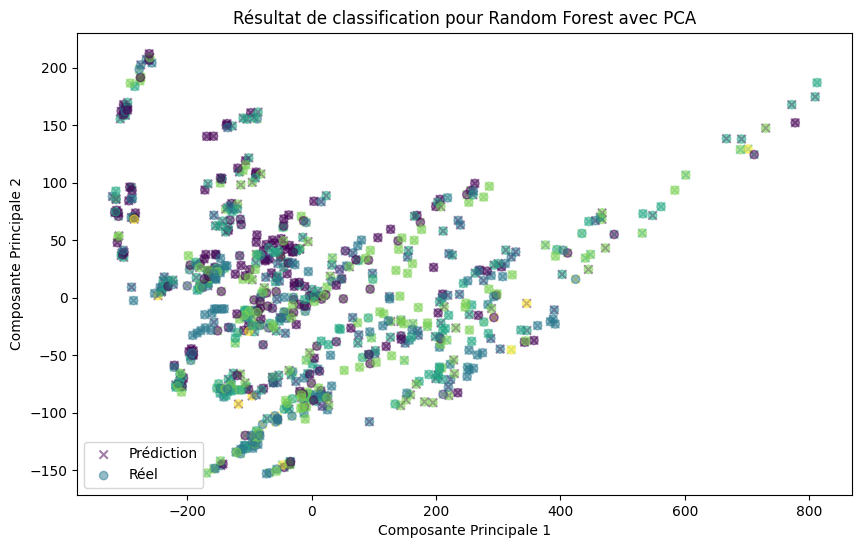

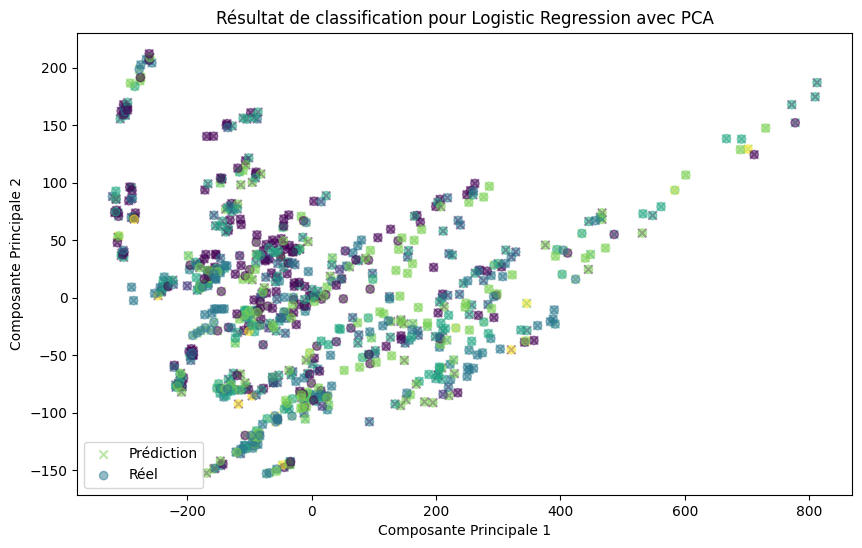

In [27]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convertir les chaînes de caractères en labels numériques
le = LabelEncoder()
y_test_class_encoded = le.fit_transform(y_test_class)
y_pred_encoded = le.transform(y_pred)

# Utilisez ces labels numériques pour le tracé
for name, model in models.items():
    y_pred_encoded = le.transform(model.predict(X_test_class))
    
    plt.figure(figsize=(10, 6))
    
    # Tracer les données transformées
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_encoded, cmap='viridis', label='Prédiction', marker='x', alpha=0.5)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_test_class_encoded, cmap='viridis', label='Réel', marker='o', alpha=0.5)
    
    plt.title(f'Résultat de classification pour {name} avec PCA')
    plt.xlabel('Composante Principale 1')
    plt.ylabel('Composante Principale 2')
    plt.legend()
    plt.show()


<h4><strong>Gradient Boosting :</strong></h4><p>

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Sélectionnez les caractéristiques et la variable cible
X_train_class = train_data_class[features_class]
y_train_class = train_data_class['major_cause']
X_test_class = test_data_class[features_class]
y_test_class = test_data_class['major_cause']

# Initialisation du modèle Gradient Boosting avec des hyperparamètres spécifiques
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)

# Utilisation de cross_val_score pour évaluer le modèle
scores = cross_val_score(model_gb, X_train_class, y_train_class, cv=5, scoring='accuracy')

# Moyenne des scores
mean_score = scores.mean()

# Entraînement du modèle sur l'ensemble d'entraînement complet
model_gb.fit(X_train_class, y_train_class)

# Prédiction sur l'ensemble de test
y_pred_gb = model_gb.predict(X_test_class)

# Calcul de la précision
accuracy_gb = accuracy_score(y_test_class, y_pred_gb)
print(accuracy_gb)
print(classification_report(y_test_class, y_pred))
print(confusion_matrix(y_test_class, y_pred))

0.39807162534435264
                                      precision    recall  f1-score   support

                  prct_cause_externe       0.36      0.73      0.48       188
             prct_cause_gestion_gare       0.00      0.00      0.00        10
           prct_cause_gestion_trafic       0.79      0.42      0.55       184
                    prct_cause_infra       0.42      0.19      0.27       175
         prct_cause_materiel_roulant       0.50      0.47      0.49       160
prct_cause_prise_en_charge_voyageurs       0.00      0.00      0.00         9

                            accuracy                           0.45       726
                           macro avg       0.34      0.30      0.30       726
                        weighted avg       0.50      0.45      0.44       726

[[138   0   6  14  30   0]
 [  8   0   0   0   2   0]
 [ 61   0  78  22  20   3]
 [111   0   8  34  21   1]
 [ 63   0   7   9  76   5]
 [  5   0   0   2   2   0]]


C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maamar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: U

- Les classes "prct_cause_gestion_gare" et "prct_cause_prise_en_charge_voyageurs" ont toutes deux une précision, un rappel et un score F1 de 0. Cela indique que le modèle n'a prédit correctement aucune instance de ces classes.
- La classe "prct_cause_gestion_trafic" a la précision la plus élevée avec 0,79, ce qui signifie que lorsque le modèle prédit cette classe, il est souvent correct.
- La classe "prct_cause_externe" a le rappel le plus élevé avec 0,73, ce qui signifie que le modèle a été capable d'identifier 73% des instances réelles de cette classe.
- La précision globale du modèle est de 0,45, ce qui signifie qu'il a correctement prédit la classe pour 45 % de l'ensemble des échantillons.
- Le score F1 macro moyen est de 0,30, ce qui indique une performance équilibrée relativement faible entre les classes lorsqu'elles sont toutes traitées de la même manière.
- Le score F1 moyen pondéré est de 0,44, ce qui est un peu plus élevé que la moyenne macro, reflétant l'impact de la distribution des classes (certaines classes ont plus d'échantillons que d'autres).

<h4><strong>KNN :</strong></h4><p>

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Sélectionnez les caractéristiques et la variable cible
X_train_class = train_data_class[features_class]
y_train_class = train_data_class['major_cause']
X_test_class = test_data_class[features_class]
y_test_class = test_data_class['major_cause']

# Initialisation du modèle KNN avec des hyperparamètres spécifiques
# Par exemple, nous utilisons ici k=5 voisins
model_knn = KNeighborsClassifier(n_neighbors=5)

# Utilisation de cross_val_score pour évaluer le modèle
scores = cross_val_score(model_knn, X_train_class, y_train_class, cv=5, scoring='accuracy')

# Moyenne des scores
mean_score = scores.mean()

# Entraînement du modèle sur l'ensemble d'entraînement complet
model_knn.fit(X_train_class, y_train_class)

# Prédiction sur l'ensemble de test
y_pred_knn = model_knn.predict(X_test_class)

# Calcul de la précision
accuracy_knn = accuracy_score(y_test_class, y_pred_knn)
print(accuracy_knn)
print(classification_report(y_test_class, y_pred_knn))
print(confusion_matrix(y_test_class, y_pred_knn))


0.3622589531680441
                                      precision    recall  f1-score   support

                  prct_cause_externe       0.33      0.56      0.41       188
             prct_cause_gestion_gare       0.00      0.00      0.00        10
           prct_cause_gestion_trafic       0.56      0.35      0.43       184
                    prct_cause_infra       0.27      0.17      0.20       175
         prct_cause_materiel_roulant       0.44      0.40      0.42       160
prct_cause_prise_en_charge_voyageurs       0.00      0.00      0.00         9

                            accuracy                           0.36       726
                           macro avg       0.27      0.25      0.24       726
                        weighted avg       0.39      0.36      0.36       726

[[106   0  16  27  31   8]
 [  3   0   0   2   5   0]
 [ 69   0  64  24  20   7]
 [ 93   0  19  29  24  10]
 [ 51   1  14  23  64   7]
 [  4   0   1   3   1   0]]


Analyse :

- Le modèle KNN semble avoir une précision inférieure à celle des autres modèles fournis.
- Les valeurs de précision, de rappel et de score F1 pour la plupart des classes sont également inférieures à celles des autres rapports.
- La matrice de confusion révèle un nombre important d'erreurs de classification. Par exemple, "prct_cause_infra" est souvent mal classé en "prct_cause_externe" (93 cas).

Comparaison avec les modèles précédents :

Le modèle KNN a la précision la plus faible de tous les modèles que vous avez partagés.
Les scores F1 du modèle KNN sont généralement inférieurs à ceux des autres modèles, ce qui indique qu'il n'est peut-être pas le meilleur choix pour cet ensemble de données ou ce problème.

 <h3><strong>Résumé :</strong></h3><p>


Nous avons fourni des mesures de performance pour différents modèles de classification (dont Random Forest, KNN et un modèle non spécifié) sur un ensemble de données comportant six classes liées à des causes dans un contexte de transport.

Aperçu des performances :

- Le modèle régression logistique et le modèle Random Forest ont eu des performances similaires, avec des scores de précision proches de 0,45.
- Le modèle K-Nearest Neighbors (KNN), pour un K = 5, a obtenu une précision nettement inférieure d'environ 0,3623, ce qui en fait le modèle le moins efficace parmi ceux que nous avons lancés.

Difficultés :

- Tous les modèles ont eu du mal à classer les classes "prct_cause_gestion_gare" et "prct_cause_prise_en_charge_voyageurs", obtenant systématiquement une précision, un rappel et un score F1 de 0 pour ces classes.
- Les matrices de confusion ont révélé que certaines classes étaient fréquemment mal classées, ce qui indique des chevauchements potentiels de caractéristiques ou d'autres complexités.
Points forts :

- Tous les modèles, en particulier Random Forest et le modèle régression logistique, ont eu leurs moments de force. Par exemple, les deux modèles ont montré une précision décente pour la classe "prct_cause_gestion_trafic".

 <h3><strong>Conclusion :</strong></h3><p>

L'approche de classification avec tous les modèles considérés n'a pas pu enregistrer de très bon résultats, même si nous avons décider d'alimenter notre dataset avec des données supplémentaires pour faciliter la classification. 

Le modèle Régression logistique sera retenu quant à cette analyse.